# HOUSEHOLD INCOME KAGGLE PROJECT

FILENAME: Analysis Notebook.ipynb
    
PROJECT: Household Income Kaggle Project

DATE CREATED:24-APR-20

DATE UPDATED:24-APR-20

AUTHOR: dxjester21

This project is from the online Kaggle completition: https://www.kaggle.com/goldenoakresearch/us-household-income-stats-geo-locations/data

The purpose of this project is to conduct exploratory analysis of the provided data set and apply both supervised and unsupervised algorithms in order to extract meaniningful information in support for future open source analysis. The project is broken down into four (4) distinct phases:

1. Environment Setup 

2. Data ETL

3. Data Exploration

4. Data Analysis

## PHASE 1: PROJECT SETUP

Import the necessary libraries needed for ETL, engineering, and export efforts

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import pandas as pd
import csv
import random
import sqlite3
import itertools
import numpy as np
import datetime
import time as t
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import getpass as gp

In [6]:
# algorithm libraries
from statsmodels.tsa.arima_model import ARIMA
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'tensorflow'

Start the project timer

In [ ]:
program_start = t.time()

Set the random seed for the project in order to ensure consistent results

In [ ]:
random.seed(6)

## PHASE 2: DATA ETL

## Raw data import

In [7]:
# import listings-2.csv into pandas dataframe
raw_df = pd.read_csv("data/ca_housing.csv") 
raw_df.head(10) #raw dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [8]:
raw_df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [9]:
work_df = raw_df.copy()

# PHASE 4: DATA ANALYSIS

## Multivariate Neural Network Model Development

In [12]:
!pip install tensorflow

  Using cached tensorflow-2.1.0-cp37-cp37m-macosx_10_11_x86_64.whl (120.8 MB)
  Using cached grpcio-1.28.1-cp37-cp37m-macosx_10_9_x86_64.whl (2.6 MB)
Processing /Users/patrickbenitez/Library/Caches/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d/absl_py-0.9.0-cp37-none-any.whl
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached tensorflow_estimator-2.1.0-py2.py3-none-any.whl (448 kB)
  Using cached tensorboard-2.1.1-py3-none-any.whl (3.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Processing /Users/patrickbenitez/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6/termcolor-1.1.0-cp37-none-any.whl
  Using cached protobuf-3.11.3-cp37-cp37m-macosx_10_9_x86_64.whl (1.3 MB)
Processing /Users/patrickbenitez/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp37-none-any.whl
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cache

In [13]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
print(tf.__version__)

2.1.0


In [14]:
work_df = work_df[['housing_median_age','total_rooms', 'population','households','longitude','median_house_value']]

In [15]:
work_df.describe()

,housing_median_age,total_rooms,population,households,longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,1425.476744,499.539680,-119.569704,206855.816909
std,12.585558,2181.615252,1132.462122,382.329753,2.003532,115395.615874
min,1.000000,2.000000,3.000000,1.000000,-124.350000,14999.000000
25%,18.000000,1447.750000,787.000000,280.000000,-121.800000,119600.000000
50%,29.000000,2127.000000,1166.000000,409.000000,-118.490000,179700.000000
75%,37.000000,3148.000000,1725.000000,605.000000,-118.010000,264725.000000
max,52.000000,39320.000000,35682.000000,6082.000000,-114.310000,500001.000000


In [16]:
work_df.head(5)

,housing_median_age,total_rooms,population,households,longitude,median_house_value
0,41,880,322,126,-122.23,452600
1,21,7099,2401,1138,-122.22,358500
2,52,1467,496,177,-122.24,352100
3,52,1274,558,219,-122.25,341300
4,52,1627,565,259,-122.25,342200


In [17]:
dataset = work_df.copy()
dataset.tail(10)

,housing_median_age,total_rooms,population,households,longitude,median_house_value
20630,11,2640,1257,445,-121.32,112000
20631,15,2655,1200,432,-121.40,107200
20632,15,2319,1047,385,-121.45,115600
20633,27,2080,1082,382,-121.53,98300
20634,28,2332,1041,344,-121.56,116800
20635,25,1665,845,330,-121.09,78100
20636,18,697,356,114,-121.21,77100
20637,17,2254,1007,433,-121.22,92300
20638,18,1860,741,349,-121.32,84700
20639,16,2785,1387,530,-121.24,89400


In [18]:
dataset.isna().sum()

housing_median_age    0
total_rooms           0
population            0
households            0
longitude             0
median_house_value    0
dtype: int64

In [19]:
x=dataset.iloc[:, 0:5].to_numpy()
y=dataset.iloc[:,5].to_numpy()
x

array([[  41.  ,  880.  ,  322.  ,  126.  , -122.23],
       [  21.  , 7099.  , 2401.  , 1138.  , -122.22],
       [  52.  , 1467.  ,  496.  ,  177.  , -122.24],
       ...,
       [  17.  , 2254.  , 1007.  ,  433.  , -121.22],
       [  18.  , 1860.  ,  741.  ,  349.  , -121.32],
       [  16.  , 2785.  , 1387.  ,  530.  , -121.24]])

In [20]:
y=np.reshape(y, (-1,1))
y

array([[452600],
       [358500],
       [352100],
       ...,
       [ 92300],
       [ 84700],
       [ 89400]])

In [21]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(x))
xscale=scaler_x.transform(x)

print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [22]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [23]:
X_train.shape

(15480, 5)

In [24]:
y_train.shape

(15480, 1)

In [25]:
model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [27]:
history = model.fit(X_train, y_train, epochs=50, batch_size=50,  verbose=1, validation_split=0.2)

Train on 12384 samples, validate on 3096 samples
Epoch 1/50
12384/12384 [==============================] - 1s 42us/sample - loss: 0.0797 - mse: 0.0797 - mae: 0.2147 - val_loss: 0.0548 - val_mse: 0.0548 - val_mae: 0.1820
Epoch 2/50
12384/12384 [==============================] - 0s 17us/sample - loss: 0.0552 - mse: 0.0552 - mae: 0.1851 - val_loss: 0.0540 - val_mse: 0.0540 - val_mae: 0.1850
Epoch 3/50
12384/12384 [==============================] - 0s 17us/sample - loss: 0.0543 - mse: 0.0543 - mae: 0.1837 - val_loss: 0.0531 - val_mse: 0.0531 - val_mae: 0.1790
Epoch 4/50
12384/12384 [==============================] - 0s 18us/sample - loss: 0.0539 - mse: 0.0539 - mae: 0.1824 - val_loss: 0.0526 - val_mse: 0.0526 - val_mae: 0.1821
Epoch 5/50
12384/12384 [==============================] - 0s 17us/sample - loss: 0.0528 - mse: 0.0528 - mae: 0.1803 - val_loss: 0.0516 - val_mse: 0.0516 - val_mae: 0.1734
Epoch 6/50
12384/12384 [==============================] - 0s 16us/sample - loss: 0.0519 - mse: 0

12384/12384 [==============================] - 0s 18us/sample - loss: 0.0406 - mse: 0.0406 - mae: 0.1569 - val_loss: 0.0399 - val_mse: 0.0399 - val_mae: 0.1543
Epoch 49/50
12384/12384 [==============================] - 0s 17us/sample - loss: 0.0403 - mse: 0.0403 - mae: 0.1565 - val_loss: 0.0399 - val_mse: 0.0399 - val_mae: 0.1544
Epoch 50/50
12384/12384 [==============================] - 0s 18us/sample - loss: 0.0405 - mse: 0.0405 - mae: 0.1566 - val_loss: 0.0408 - val_mse: 0.0408 - val_mae: 0.1551


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


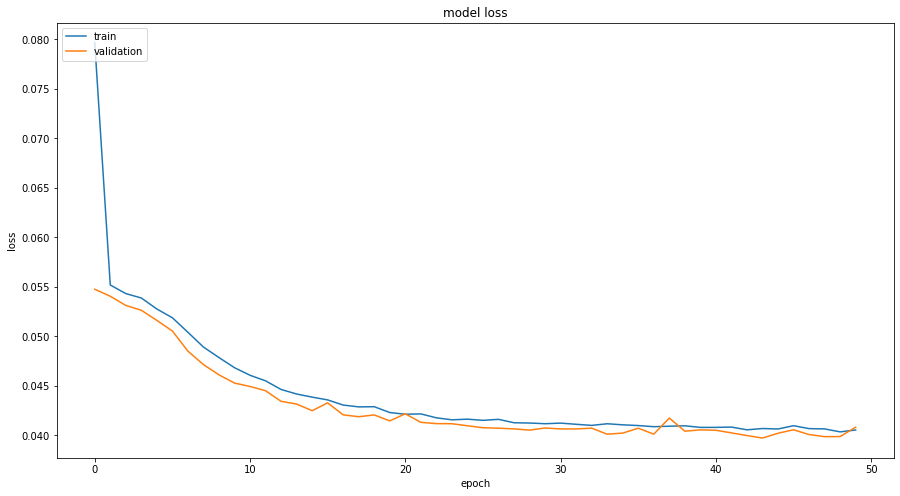

In [28]:
print(history.history.keys())
# "Loss"
plt.figure(figsize = (15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Predict Values 

In [30]:
Xnew = np.array([[40, 0, 26, 9000, 8000]])
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[  40.    0.   26. 9000. 8000.], Predicted=[3754179.2]


# PROGRAM END